In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import load_img

In [10]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    '/content/train',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

Found 1594 images belonging to 2 classes.


In [30]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [31]:
X, y = next(train_ds)

In [32]:
val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    '/content/test',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

Found 394 images belonging to 2 classes.


In [26]:
inputs = keras.Input(shape=(150, 150, 3))

conv = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(inputs)

vectors = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)

flatten = keras.layers.Flatten()(vectors)

dense = keras.layers.Dense(64, activation='relu')(flatten)

outputs = keras.layers.Dense(1, activation='sigmoid')(dense)

model = keras.Model(inputs, outputs)

In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                           

In [28]:
optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)

In [33]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
80/80 [==============================] - 34s 414ms/step - loss: 0.6756 - accuracy: 0.5903 - val_loss: 0.6018 - val_accuracy: 0.7132
Epoch 2/10
80/80 [==============================] - 35s 431ms/step - loss: 0.5424 - accuracy: 0.7566 - val_loss: 0.4791 - val_accuracy: 0.8122
Epoch 3/10
80/80 [==============================] - 34s 429ms/step - loss: 0.4426 - accuracy: 0.8124 - val_loss: 0.4212 - val_accuracy: 0.8173
Epoch 4/10
80/80 [==============================] - 33s 411ms/step - loss: 0.3848 - accuracy: 0.8450 - val_loss: 0.3730 - val_accuracy: 0.8553
Epoch 5/10
80/80 [==============================] - 34s 429ms/step - loss: 0.3388 - accuracy: 0.8695 - val_loss: 0.3651 - val_accuracy: 0.8452
Epoch 6/10
80/80 [==============================] - 35s 441ms/step - loss: 0.3024 - accuracy: 0.8871 - val_loss: 0.3903 - val_accuracy: 0.8122
Epoch 7/10
80/80 [==============================] - 33s 414ms/step - loss: 0.2813 - accuracy: 0.8833 - val_loss: 0.3491 - val_accuracy: 0.8350

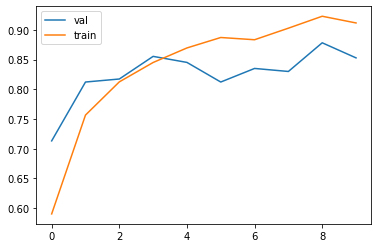

In [48]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

In [52]:
np.std(history.history['loss'])

0.1396135200535117

In [53]:
# Data augmentations

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

train_ds = train_gen.flow_from_directory(
    '/content/train',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

Found 1594 images belonging to 2 classes.


In [54]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
80/80 [==============================] - 42s 518ms/step - loss: 0.4653 - accuracy: 0.7905 - val_loss: 0.3382 - val_accuracy: 0.8579
Epoch 2/10
80/80 [==============================] - 40s 498ms/step - loss: 0.4433 - accuracy: 0.7942 - val_loss: 0.2920 - val_accuracy: 0.8858
Epoch 3/10
80/80 [==============================] - 40s 500ms/step - loss: 0.4203 - accuracy: 0.8055 - val_loss: 0.2991 - val_accuracy: 0.8731
Epoch 4/10
80/80 [==============================] - 41s 508ms/step - loss: 0.3947 - accuracy: 0.8281 - val_loss: 0.3327 - val_accuracy: 0.8604
Epoch 5/10
80/80 [==============================] - 40s 503ms/step - loss: 0.3865 - accuracy: 0.8287 - val_loss: 0.2860 - val_accuracy: 0.8883
Epoch 6/10
80/80 [==============================] - 42s 517ms/step - loss: 0.3851 - accuracy: 0.8287 - val_loss: 0.3234 - val_accuracy: 0.8604
Epoch 7/10
80/80 [==============================] - 40s 501ms/step - loss: 0.3791 - accuracy: 0.8300 - val_loss: 0.3519 - val_accuracy: 0.8528

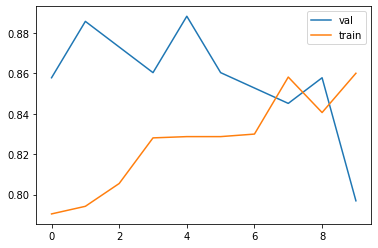

In [55]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

In [56]:
np.mean(history.history['val_loss'])

0.3404589831829071